# Part I - WeatherPy
In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.

In [1]:
import requests
import json
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from random import uniform
import numpy as np
from pprint import pprint
from api_keys import weather_api_key

## Generate Cities List

In [2]:
# From Citipy I want to generate a list of random cities all over the world
lat_lngs = []   #list for my latitudes and longitudes
cities = []     #list for my cities

# Create the list of random coordinate combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1700)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1700)
lat_lngs = zip(lats, lngs)

#Create a list of cities near these coordinates
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Printing to check everything is working the way I want.
#len(lngs)
#len(lats)
len(cities)
#cities


686

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [3]:
# I will need to call each city and get it's corresponding lat, Temp (F/Imperial), Humidity 
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="
response = requests.get(url+"London")
response_json=response.json()
pprint(response_json)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 51.5085, 'lon': -0.1257},
 'dt': 1627852690,
 'id': 2643743,
 'main': {'feels_like': 58.96,
          'humidity': 85,
          'pressure': 1015,
          'temp': 59.34,
          'temp_max': 61.9,
          'temp_min': 55.69},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 2019646,
         'sunrise': 1627791859,
         'sunset': 1627847352,
         'type': 2},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 70, 'speed': 8.05}}


In [4]:
#for city in cities:
    #print(city)

In [5]:
# List for the data to make DF. 
cities_found = []
countries = []
lats = []
lngs = []
temps = []
humidities = []
clouds = []
winds = []

# Set the initial count to tell my for loop to take a break from calling the API.
count_one = 0
set_one = 1

# Loop through the Citipi list coordinates and identify if there is a cooresponding city on my URL.
for city in cities:
    try:
        response = requests.get(url + city).json()
        countries.append(response['sys']['country'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        temps.append(response['main']['temp_max'])
        humidities.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        winds.append(response['wind']['speed'])
        cities_found.append(city)
        #print(f"Beginning Data Retrieval")     
        #print(f"-----------------------------")
        if count_one > 48:
            count_one = 1
            set_one += 1
            time.sleep(60)
        else:
            count_one+=1
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except:
        #print("    ")
        print("City not found. Skipping..... ")
print("-----------------------------\nData Retrieval Complete\n-----------------------------")
        
        

Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | willmar
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | tuatapere
Processing Record 5 of Set 1 | bobcaygeon
City not found. Skipping..... 
Processing Record 6 of Set 1 | bankura
Processing Record 7 of Set 1 | hobart
City not found. Skipping..... 
Processing Record 8 of Set 1 | dingle
Processing Record 9 of Set 1 | mahibadhoo
Processing Record 10 of Set 1 | skjervoy
Processing Record 11 of Set 1 | bluefield
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | aloleng
Processing Record 14 of Set 1 | khalki
Processing Record 15 of Set 1 | kruisfontein
City not found. Skipping..... 
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | port hawkesbury
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | atuona
City not found. Skipping..... 
Processing Record 21 of Set 1 | puerto ayora
Proces

Processing Record 41 of Set 4 | merauke
Processing Record 42 of Set 4 | durban
Processing Record 43 of Set 4 | ixtapa
City not found. Skipping..... 
Processing Record 44 of Set 4 | nautla
Processing Record 45 of Set 4 | buala
Processing Record 46 of Set 4 | mantamados
Processing Record 47 of Set 4 | pauini
City not found. Skipping..... 
Processing Record 48 of Set 4 | kishapu
Processing Record 49 of Set 4 | prince rupert
City not found. Skipping..... 
Processing Record 2 of Set 5 | puerto escondido
Processing Record 3 of Set 5 | altotting
City not found. Skipping..... 
Processing Record 4 of Set 5 | hofn
Processing Record 5 of Set 5 | rantepao
City not found. Skipping..... 
Processing Record 6 of Set 5 | fortuna
Processing Record 7 of Set 5 | mandalgovi
Processing Record 8 of Set 5 | honningsvag
Processing Record 9 of Set 5 | nanortalik
Processing Record 10 of Set 5 | haines junction
Processing Record 11 of Set 5 | malakal
City not found. Skipping..... 
Processing Record 12 of Set 5 | 

Processing Record 31 of Set 8 | codrington
Processing Record 32 of Set 8 | tecoanapa
Processing Record 33 of Set 8 | kansanshi
Processing Record 34 of Set 8 | ola
Processing Record 35 of Set 8 | tromso
Processing Record 36 of Set 8 | coruripe
Processing Record 37 of Set 8 | yanji
Processing Record 38 of Set 8 | san patricio
Processing Record 39 of Set 8 | mar del plata
Processing Record 40 of Set 8 | beyneu
Processing Record 41 of Set 8 | nisia floresta
City not found. Skipping..... 
Processing Record 42 of Set 8 | nacala
Processing Record 43 of Set 8 | williston
Processing Record 44 of Set 8 | deputatskiy
Processing Record 45 of Set 8 | souillac
Processing Record 46 of Set 8 | susanville
Processing Record 47 of Set 8 | male
Processing Record 48 of Set 8 | tobermory
Processing Record 49 of Set 8 | vilhena
City not found. Skipping..... 
Processing Record 2 of Set 9 | hamina
Processing Record 3 of Set 9 | santa isabel do rio negro
Processing Record 4 of Set 9 | ajaccio
Processing Record 

Processing Record 19 of Set 12 | puerto del rosario
Processing Record 20 of Set 12 | custodia
Processing Record 21 of Set 12 | sao domingos do prata
Processing Record 22 of Set 12 | kochevo
Processing Record 23 of Set 12 | edson
Processing Record 24 of Set 12 | vermillion
Processing Record 25 of Set 12 | piney green
Processing Record 26 of Set 12 | songjianghe
Processing Record 27 of Set 12 | raudeberg
Processing Record 28 of Set 12 | nunoa
City not found. Skipping..... 
Processing Record 29 of Set 12 | molina
Processing Record 30 of Set 12 | kyra
Processing Record 31 of Set 12 | odweyne
Processing Record 32 of Set 12 | dawson creek
Processing Record 33 of Set 12 | dasoguz
Processing Record 34 of Set 12 | san carlos de bariloche
Processing Record 35 of Set 12 | sur
Processing Record 36 of Set 12 | tautira
Processing Record 37 of Set 12 | samarai
Processing Record 38 of Set 12 | soke
Processing Record 39 of Set 12 | ambatofinandrahana
Processing Record 40 of Set 12 | aripuana
Processing

In [6]:
#Checking the number of cities collected.
len(cities_found)

624

## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Making my DF.
cities_df = pd.DataFrame({
    "City":cities_found,
    "Country":countries,
    "Latitude":lats,
    "Longitude":lngs, 
    "Temperature":temps,
    "Humidity":humidities,
    "Cloudiness":clouds,
    "Wind":winds,
})
#pd.set_option("display.max_rows", None, "display.max_columns", None)
cities_df.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind
0,georgetown,MY,5.4112,100.3354,76.89,92,20,2.30
1,willmar,US,45.1219,-95.0433,80.19,29,40,13.80
2,avarua,CK,-21.2078,-159.7750,75.25,94,75,13.80
3,tuatapere,NZ,-46.1333,167.6833,41.83,91,100,4.21
4,bobcaygeon,CA,44.5462,-78.5420,63.63,91,100,7.20


In [8]:
#Exporting to CSV file. 
cities_df.to_csv("cities_df.csv")

## Inspect the data and remove the cities where the humidity > 100%.
Skip this step if there are no cities that have humidity > 100%.

In [9]:
cities_df.describe()

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000
mean,19.792680,20.689051,69.102708,70.084936,50.833333,7.870369
std,33.199174,86.968251,14.070229,22.009501,38.851544,5.620969
min,-54.800000,-179.166700,32.320000,10.000000,0.000000,0.000000
25%,-7.946875,-57.597775,59.160000,57.000000,10.000000,3.822500
50%,22.253050,26.380600,69.595000,75.000000,49.500000,6.420000
75%,47.901425,99.266225,78.790000,87.000000,90.000000,10.540000
max,78.218600,179.316700,110.030000,100.000000,100.000000,27.780000


In [10]:
#  Get the indices of cities that have humidity over 100%. There are none.
cities_df[cities_df['Humidity']>100]

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind


Your first requirement is to create a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot add a sentence or too explaining what the code is and analyzing.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot¶

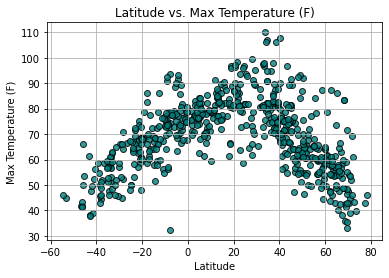

In [28]:
x_values = cities_df['Latitude']
y_values = cities_df['Temperature']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Latitude vs. Max Temperature (F)")
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot¶

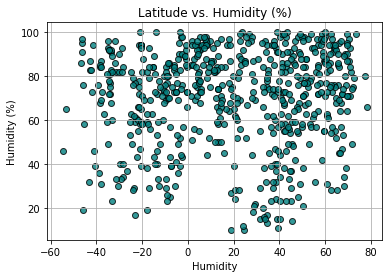

In [27]:
x_values = cities_df['Latitude']
y_values = cities_df['Humidity']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.8)
plt.xlabel('Humidity')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs. Humidity (%)")
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

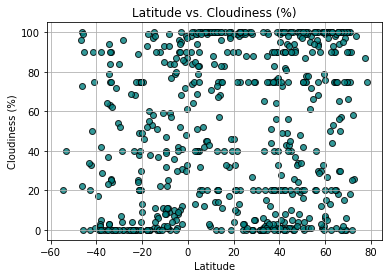

In [26]:
x_values = cities_df['Latitude']
y_values = cities_df['Cloudiness']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs. Cloudiness (%)")
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot¶

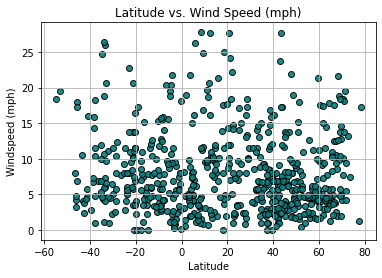

In [25]:
x_values = cities_df['Latitude']
y_values = cities_df['Wind']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.9)
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title("Latitude vs. Wind Speed (mph)")
plt.grid(True)
plt.show()

## Linear Regression

Your second requirement is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

## Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
from scipy import stats

In [16]:
#divide Data Set into Northern and Southern hemisheres.
northern_df=cities_df[cities_df['Latitude']>0]
southern_df=cities_df[cities_df['Latitude']<0]
#Just checking I didn't leave any city out.
equator=cities_df[cities_df['Latitude']==0]
#len(equator)
#northern_df

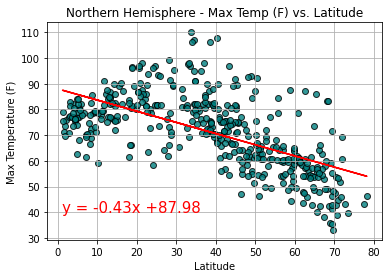

The r-value is: 0.38413705860389974


In [17]:
x_values = northern_df['Latitude']
y_values = northern_df['Temperature']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.8)
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Add regression line
plt.plot(x_values,regress_values,"r-")
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Label plot and annotate the line equation
plt.annotate(line_eq,(1,40),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Northern Hemisphere - Max Temp (F) vs. Latitude")
plt.grid(True)
plt.show()


# Print r value
print(f"The r-value is: {rvalue**2}")



## Southern Hemisphere - Max Temp vs. Latitude Linear Regression

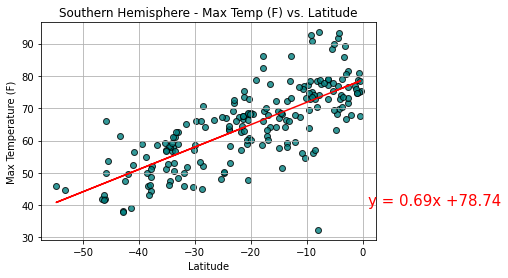

The r-value is: 0.5661408395767201


In [18]:
x_values = southern_df['Latitude']
y_values = southern_df['Temperature']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.8)
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Add regression line
plt.plot(x_values,regress_values,"r-")
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Label plot and annotate the line equation
plt.annotate(line_eq,(1,40),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Southern Hemisphere - Max Temp (F) vs. Latitude")
plt.grid(True)
plt.show()


# Print r value
print(f"The r-value is: {rvalue**2}")


## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression¶

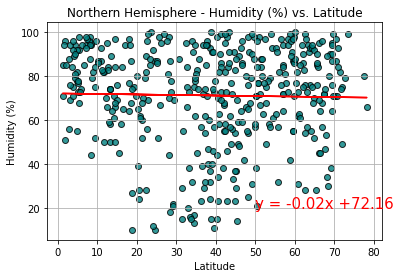

The r-value is: 0.000502657631299749


In [19]:
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.8)
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Add regression line
plt.plot(x_values,regress_values,"r-")
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Label plot and annotate the line equation
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.grid(True)
plt.show()


# Print r value
print(f"The r-value is: {rvalue**2}")


## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

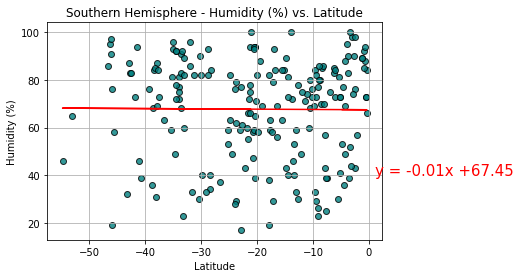

The r-value is: 6.142913461589776e-05


In [20]:
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.8)
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Add regression line
plt.plot(x_values,regress_values,"r-")
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Label plot and annotate the line equation
plt.annotate(line_eq,(1,40),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.grid(True)
plt.show()


# Print r value
print(f"The r-value is: {rvalue**2}")

## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression¶

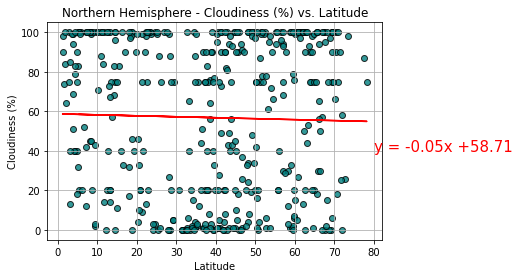

The r-value is: 0.000656782749231668


In [21]:
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.8)
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Add regression line
plt.plot(x_values,regress_values,"r-")
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Label plot and annotate the line equation
plt.annotate(line_eq,(80,40),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.grid(True)
plt.show()


# Print r value
print(f"The r-value is: {rvalue**2}")


## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

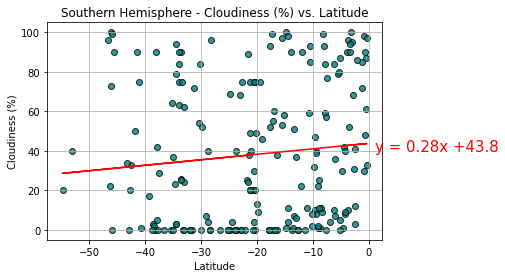

The r-value is: 0.010899064539430271


In [22]:
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.8)
# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Add regression line
plt.plot(x_values,regress_values,"r-")
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Label plot and annotate the line equation
plt.annotate(line_eq,(1,40),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.grid(True)
plt.show()


# Print r value
print(f"The r-value is: {rvalue**2}")


## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

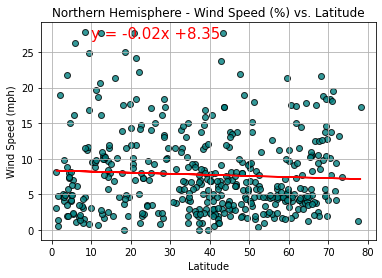

The r-value is: 0.0031273504720739525


In [23]:
x_values = northern_df['Latitude']
y_values = northern_df['Wind']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.8)
# Perform a linear regression on windiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Add regression line
plt.plot(x_values,regress_values,"r-")
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Label plot and annotate the line equation
plt.annotate(line_eq,(10,27),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Northern Hemisphere - Wind Speed (%) vs. Latitude")
plt.grid(True)
plt.show()


# Print r value
print(f"The r-value is: {rvalue**2}")


## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

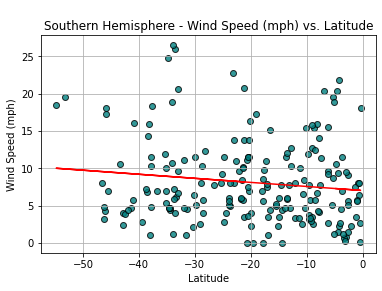

The r-value is: 0.017095203026670676


In [24]:
x_values = southern_df['Latitude']
y_values = southern_df['Wind']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.8)
# Perform a linear regression on windiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Add regression line
plt.plot(x_values,regress_values,"r-")
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Label plot and annotate the line equation
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.grid(True)
plt.show()


# Print r value
print(f"The r-value is: {rvalue**2}")


Your final notebook must:

* Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.

## Three Observable Trends

* Temperature and latitude appear to have the greatest correlation with the maximum temperature appearing to be highest closest to the equator.  
* There is no discernable correlation between wind speed and latitude. 
* There appears to be a small correlation between latitude and both cloudiness and humidity however, I might would compare temperature to humidity and humidity to cloudiness to add to this analysis. 